In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('Loading data...')
bulbasaur_path  = os.getcwd() + '/pokemon_bulbasaur.pickle'  
charmander_path = os.getcwd() + '/pokemon_charmander.pickle'
squirtle_path   = os.getcwd() + '/pokemon_squirtle.pickle'
pikachu_path    = os.getcwd() + '/pokemon_pikachu.pickle'

bulbasaur  = pickle.load(open(bulbasaur_path, 'rb'))
charmander = pickle.load(open(charmander_path, 'rb'))
squirtle   = pickle.load(open(squirtle_path, 'rb'))
pikachu    = pickle.load(open(pikachu_path, 'rb'))
print('Data loaded.')


Loading data...
Data loaded.


In [3]:

# check same length
if len(bulbasaur) != len(charmander) or len(charmander) != len(squirtle) or len(squirtle) != len(pikachu):
    print('Error: Different length of data')
    exit()

n_games = len(bulbasaur)
n_battle = len(bulbasaur[0])
    
starter_win = 'starter_win'

list_count_bulbasaur_win = []
list_count_charmander_win = []
list_count_squirtle_win = []
list_count_pikachu_win = []

list_turn_b = []
list_turn_c = []
list_turn_s = []
list_turn_p = []

for i in range(0, n_games):
    c_bulbasaur  = bulbasaur[i]
    c_charmander = charmander[i]
    c_squirtle   = squirtle[i]
    c_pickachu   = pikachu[i]
    count_bulbasaur = 0 
    count_charmander = 0
    count_squirtle = 0
    count_pikachu = 0
    
    c_turn_b = 0
    c_turn_c = 0
    c_turn_s = 0
    c_turn_p = 0
    for j in range(0, n_battle):
        c_ij_bulbasaur  = c_bulbasaur[j]
        c_ij_charmander = c_charmander[j]
        c_ij_squirtle   = c_squirtle[j]
        c_ij_pikachu    = c_pickachu[j]
        
        if c_ij_bulbasaur['fight_results'] == starter_win:
            count_bulbasaur += 1
        if c_ij_charmander['fight_results'] == starter_win:
            count_charmander += 1
        if c_ij_squirtle['fight_results'] == starter_win:
            count_squirtle += 1
        if c_ij_pikachu['fight_results'] == starter_win:
            count_pikachu += 1
            
        c_turn_b += c_ij_bulbasaur['n_turns']
        c_turn_c += c_ij_charmander['n_turns']
        c_turn_s += c_ij_squirtle['n_turns']
        c_turn_p += c_ij_pikachu['n_turns']
            
    list_count_bulbasaur_win.append(count_bulbasaur)
    list_count_charmander_win.append(count_charmander)
    list_count_squirtle_win.append(count_squirtle)
    list_count_pikachu_win.append(count_pikachu)
    
    list_turn_b.append(c_turn_b)
    list_turn_c.append(c_turn_c)
    list_turn_s.append(c_turn_s)
    list_turn_p.append(c_turn_p)
            


## Simple Plot

In [4]:
np.cumsum(list_count_bulbasaur_win)

array([   34,    63,    94,   120,   151,   183,   223,   250,   283,
         316,   342,   366,   397,   424,   456,   492,   529,   563,
         603,   633,   663,   695,   726,   762,   795,   828,   855,
         882,   913,   950,   997,  1024,  1058,  1100,  1136,  1160,
        1191,  1223,  1250,  1288,  1320,  1355,  1376,  1415,  1442,
        1476,  1512,  1549,  1574,  1616,  1657,  1687,  1715,  1754,
        1783,  1813,  1849,  1872,  1908,  1943,  1973,  2005,  2029,
        2060,  2091,  2128,  2170,  2202,  2238,  2278,  2303,  2337,
        2370,  2410,  2446,  2472,  2507,  2542,  2582,  2620,  2653,
        2687,  2732,  2768,  2798,  2830,  2863,  2899,  2942,  2966,
        2997,  3025,  3053,  3094,  3132,  3161,  3188,  3215,  3254,
        3283,  3317,  3353,  3385,  3421,  3448,  3481,  3516,  3561,
        3588,  3619,  3662,  3698,  3731,  3772,  3807,  3840,  3872,
        3901,  3926,  3970,  3998,  4038,  4062,  4086,  4121,  4157,
        4194,  4233,

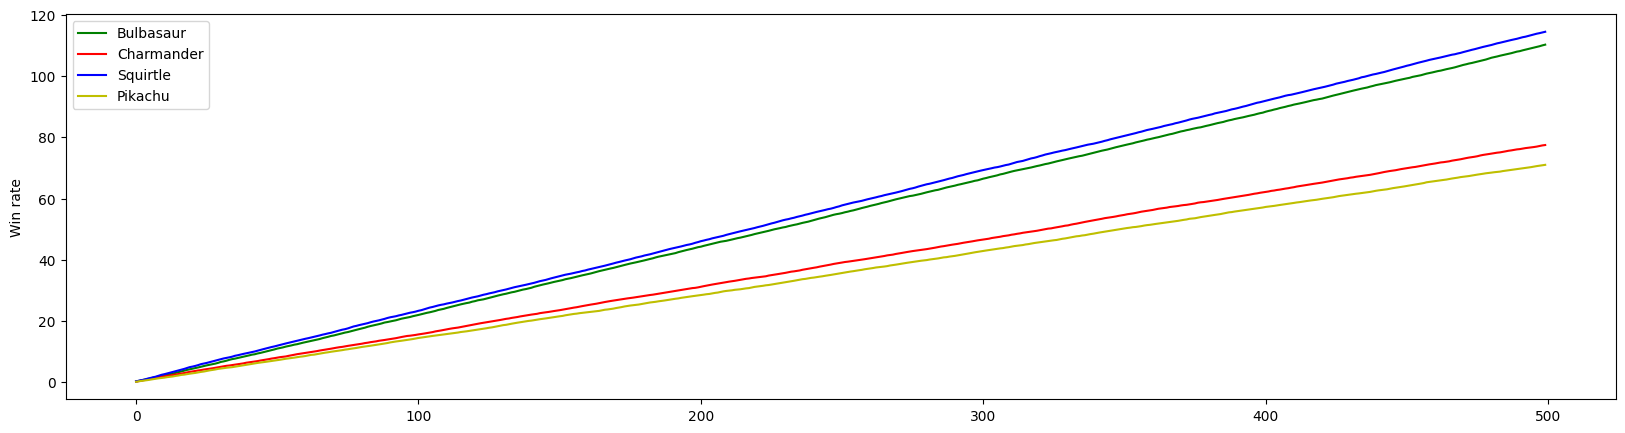

In [5]:
# avg_win_rate_bulbasaur  = np.array(list_count_bulbasaur_win)  / n_battle
# avg_win_rate_charmander = np.array(list_count_charmander_win) / n_battle
# avg_win_rate_squirtle   = np.array(list_count_squirtle_win)   / n_battle
# avg_win_rate_pikachu    = np.array(list_count_pikachu_win)    / n_battle

avg_win_rate_bulbasaur  = np.cumsum(list_count_bulbasaur_win)  / n_battle
avg_win_rate_charmander = np.cumsum(list_count_charmander_win)  / n_battle
avg_win_rate_squirtle   = np.cumsum(list_count_squirtle_win)  / n_battle 
avg_win_rate_pikachu    = np.cumsum(list_count_pikachu_win)  / n_battle

plt.figure(figsize=(20, 5))
plt.plot(avg_win_rate_bulbasaur, 'g')
plt.plot(avg_win_rate_charmander, 'r')
plt.plot(avg_win_rate_squirtle, 'b')
plt.plot(avg_win_rate_pikachu, 'y')
plt.ylabel('Win rate')
plt.legend(['Bulbasaur', 'Charmander', 'Squirtle', 'Pikachu'])
plt.show()
    

## Box Plot

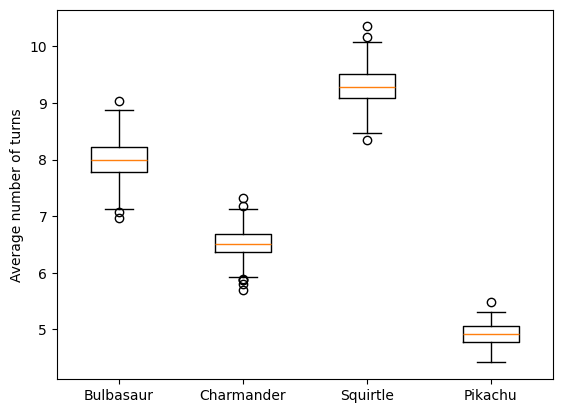

In [6]:
avg_turn_b = np.array(list_turn_b) / n_battle
avg_turn_c = np.array(list_turn_c) / n_battle
avg_turn_s = np.array(list_turn_s) / n_battle
avg_turn_p = np.array(list_turn_p) / n_battle

ax = plt.subplot(1, 1, 1)
ax.boxplot((avg_turn_b.tolist(), avg_turn_c.tolist(), avg_turn_s.tolist(), avg_turn_p.tolist()))
ax.set_ylabel('Average number of turns')
ax.set_xticklabels(['Bulbasaur', 'Charmander', 'Squirtle', 'Pikachu'])
plt.show()

## Bar Charts